create potential feature mappage.
basically predict where the pupil might be.
This will require some sort of classification??
forget about the boounding box just predict the center.

include:
    1. save data as a pkl file.
    2. include the object class this could help the model distiguish between eye and no eye.
    3. 

feature map model:
    looking for a very abstract feature map that accepts a high resolution image.

feature map: 
    the map output from feature map model used to determine potential objects.
    
feature map coordintaes:
    the general coordinates of an object and its class

grid: 
    grid that predefines blocks lock to

pre defined bounding blocks:
    blocks that will be set around each point on the grid that corresponds to 
    
loss:
    




In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import os as os
import pickle
import cv2

In [2]:
with open('data\\data.pkl', 'rb') as file:
        data = pickle.load(file)

In [5]:
X_train = data[0]
y_train = data[1]
X_test = data[2]
y_train = data[3]
X_val = data[4]
y_val = data[5]

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [7]:
def show_feat_map(model, data):
    ''' 
    show_feat_map displays the feature map (image) after each filter is applied. 

    :param result: takes in the 4D tensor output from MaxPooling2D layer with format (batch_size, rows, cols, channels). 
    '''

    model.build()
    model.summary()
    result = model.predict(data)
    for i in range(64):
        feature_img = result[0, :, :, i]
        ax = plt.subplot(8, 8, i+1)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_img, cmap='grey')
    plt.show


In [8]:
model = Sequential()

In [9]:
#Block 1
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(170, 170, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 170, 170, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 170, 170, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 64)       0         
 )                                                               
                                                                 
Total params: 37,568
Trainable params: 37,568
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 1s 46ms/step


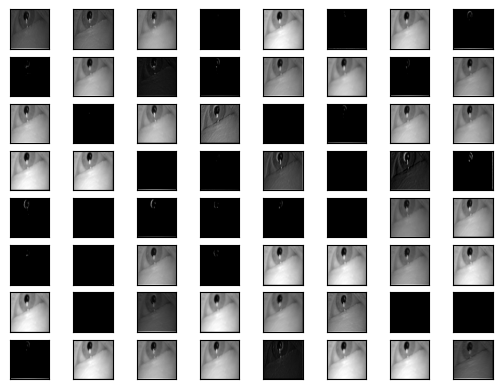

In [10]:
show_feat_map(model, X_test)

In [11]:
#Block 2
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [12]:
#Block 3
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 170, 170, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 170, 170, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 128)      0         
 2D)                                                    

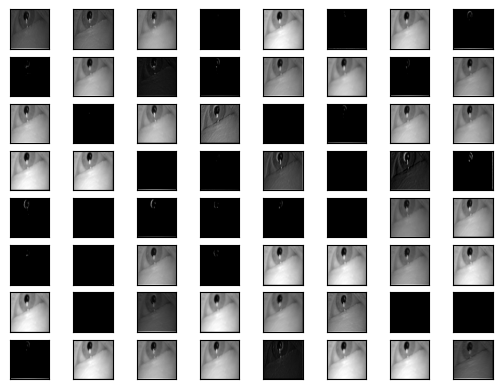

In [13]:
show_feat_map(model, X_test)

In [14]:
#Block 4
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [15]:
#Block 5
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 170, 170, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 170, 170, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 128)      0         
 2D)                                                    

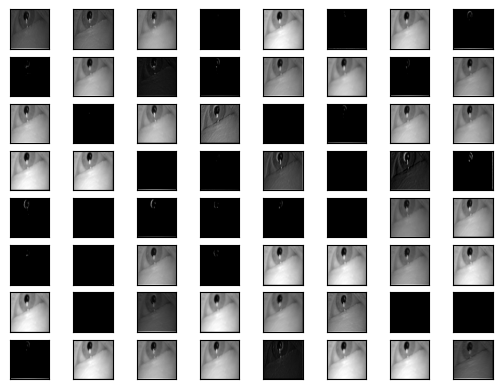

In [16]:
show_feat_map(model, X_test)

In [19]:
#one edit I made was to change the loss funciton to mean squared error.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import SGD
loss = Huber(delta=1.0)

model = Sequential()
model.add(Conv2D(24, (3, 3), activation='relu', input_shape=(170, 170, 1)))
model.add(MaxPooling2D(2, 2)) 
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (4, 4), activation='relu'))
model.add(MaxPooling2D(2, 2)) 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 168, 168, 24)      240       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 84, 84, 24)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 82, 82, 32)        6944      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 41, 41, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 19, 19, 64)      

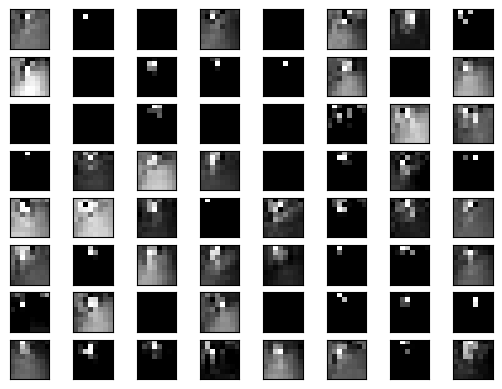

In [20]:
show_feat_map(model, X_test)